In bagging, we generate models from bootstap samples.

The problem is that points are part only missing in $\frac{1}{e}$ of the samples, so if the learners are unbiased (e.g., fully built-out decision trees), then no matter how much data we have, the prediction at any training is closer to the training label than the average of nearby value.

Perhaps we would get better predictions if we build learners out of smaller sub-samples.

In [99]:
import numpy as np
from scipy import stats
from sklearn.tree import DecisionTreeRegressor
from sklearn.base import clone
import matplotlib.pyplot as plt
%matplotlib inline


Let's take really simple data with where y is independent of x, just normal noise.

In [100]:
npts = 100
ntrees = 500
x = stats.uniform(0, 1).rvs(npts)
y = stats.norm(0, 1).rvs(npts)

In [101]:
class Ensemble:
    def __init__(self, model, n_estimators=100, fraction=1.0):
        self.model = model
        self.models = []
        self.n_estimators = n_estimators
        self.fraction = fraction
        
    def fit(self, X, y):
        for i in range(self.n_estimators):
            model = clone(self.model)
            bs_indices = np.random.choice(range(npts),
                                          int(npts*self.fraction),
                                          replace=True)
            model.fit(X[bs_indices], y[bs_indices])
            self.models.append(model)
            
    def predict(self, X):
        predictions = np.zeros((self.n_estimators, len(X)))
        for i in range(self.n_estimators):
            predictions[i] = self.models[i].predict(X)
        return predictions.mean(axis=0)

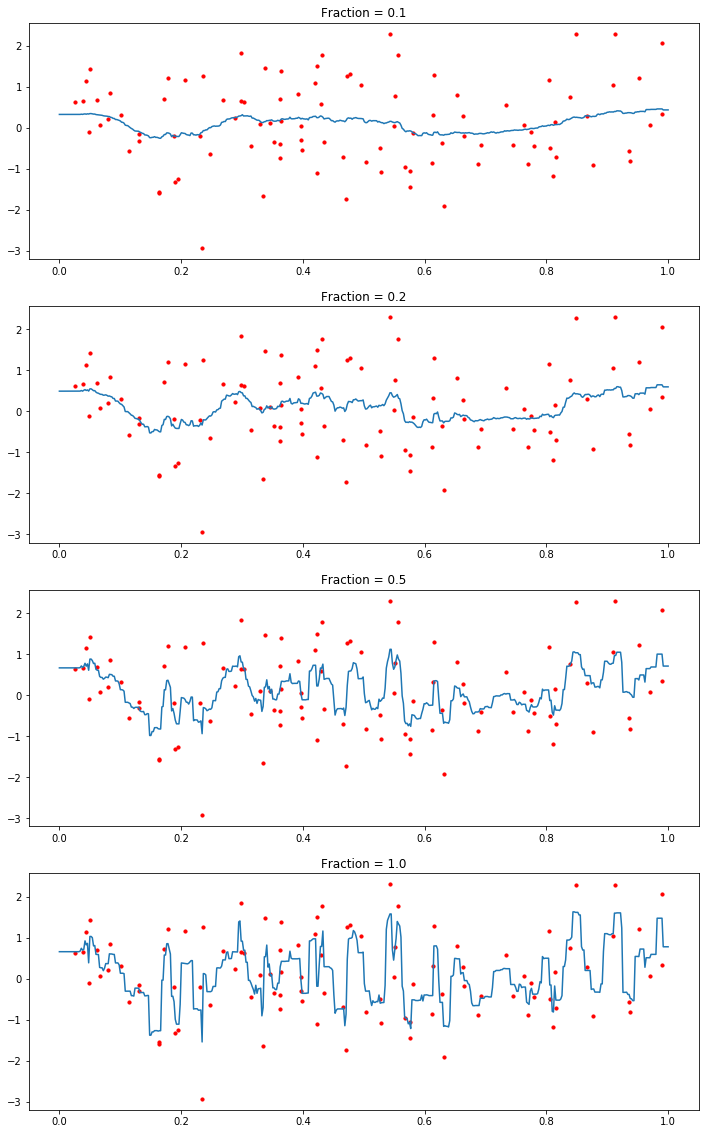

In [102]:
fig, axs = plt.subplots(4, figsize=(12,20))
for i, fraction in enumerate([0.1, 0.2, 0.5, 1.0]):
    model = Ensemble(DecisionTreeRegressor(), 1000, fraction)
    model.fit(x[:, None], y)

    axs[i].scatter(x, y, s=10, color='red')
    xpts = np.linspace(0, 1, 500)
    axs[i].plot(xpts, model.predict(xpts[:, None]))
    axs[i].set_title(f'Fraction = {fraction}')

So based on the simplest case possible, fewer data are better. :)

Next up: a less fake situation.

Looking at sklearn, this is the `max_samples` hyperparameter. So maybe this isn't anything interesting, though it is new to versin 0.22.